In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [ ]:
df = pd.read_csv("fake_job_postings.csv", on_bad_lines='skip')

In [ ]:
df.rename(columns={'fraudulent': 'is_scam'}, inplace=True)

In [ ]:
df.drop(['company_profile', 'description', 'requirements', 'benefits'], axis=1, inplace=True)
#df

In [ ]:
from scipy.stats import skewnorm
import numpy as np

np.random.seed(42)

def generate_skewed_data(size, mean, std, skew):
    """Generate skewed synthetic data."""
    shape = skew  # Skew (positive = right skew, negative = left skew)
    scale = std
    loc = mean
    return skewnorm.rvs(shape, loc=loc, scale=scale, size=size)

skew_values = {
    "non_https_links": (0, 0),
    "id_info_requested": (1, -2),
    "avg_days_offer": (-1, 2.5),
}

df['non_https_links'] = 0
df['id_info_requested'] = 0
df['avg_days_offer'] = 0.0

df.loc[df['is_scam'] == 0.0, 'non_https_links'] = generate_skewed_data(
    len(df[df['is_scam'] == 0.0]), mean=0.2, std=0.1, skew=skew_values["non_https_links"][0]
).round().astype(int)

df.loc[df['is_scam'] == 0.0, 'id_info_requested'] = generate_skewed_data(
    len(df[df['is_scam'] == 0.0]), mean=0.2, std=0.3, skew=skew_values["id_info_requested"][0]
).round().astype(int)

df.loc[df['is_scam'] == 0.0, 'avg_days_offer'] = generate_skewed_data(
    len(df[df['is_scam'] == 0.0]), mean=20, std=10, skew=skew_values["avg_days_offer"][0]
)

df.loc[df['is_scam'] == 1.0, 'non_https_links'] = generate_skewed_data(
    len(df[df['is_scam'] == 1.0]), mean=0.4, std=0.4, skew=skew_values["non_https_links"][1]
).round().astype(int)

df.loc[df['is_scam'] == 1.0, 'id_info_requested'] = generate_skewed_data(
    len(df[df['is_scam'] == 1.0]), mean=0.7, std=0.4, skew=skew_values["id_info_requested"][1]
).round().astype(int)

df.loc[df['is_scam'] == 1.0, 'avg_days_offer'] = generate_skewed_data(
    len(df[df['is_scam'] == 1.0]), mean=3, std=2.8, skew=skew_values["avg_days_offer"][1]
)

df['non_https_links'] = df['non_https_links'].clip(0, 1)
df['id_info_requested'] = df['id_info_requested'].clip(0, 1)

print(df[['is_scam', 'non_https_links', 'id_info_requested',  'avg_days_offer']].describe())
#df.head()


            is_scam  non_https_links  id_info_requested  avg_days_offer
count  17880.000000     17880.000000       17880.000000    17880.000000
mean       0.048434         0.019911           0.297427       13.935426
std        0.214688         0.139697           0.457139        8.272957
min        0.000000         0.000000           0.000000      -18.231893
25%        0.000000         0.000000           0.000000        7.964712
50%        0.000000         0.000000           0.000000       13.984032
75%        0.000000         0.000000           1.000000       19.701160
max        1.000000         1.000000           1.000000       45.827663


In [ ]:
# Define skew values
skew_values.update({
    "avg_urgent_terms": (0.12, 0.1),
    "avg_bait_phrases": (-0.7, 0.3)
})

df['avg_urgent_terms'] = 0.0
df['avg_bait_phrases'] = 0.0

# Generate and assign values for non-fraudulent (0.0)
df.loc[df['is_scam'] == 0.0, 'avg_urgent_terms'] = generate_skewed_data(
    len(df[df['is_scam'] == 0.0]), mean=3.2, std=2, skew=skew_values["avg_urgent_terms"][0]
)

df.loc[df['is_scam'] == 0.0, 'avg_bait_phrases'] = generate_skewed_data(
    len(df[df['is_scam'] == 0.0]), mean=1.9, std=1.9, skew=skew_values["avg_bait_phrases"][0]
)

# Generate and assign values for fraudulent (1.0)
df.loc[df['is_scam'] == 1.0, 'avg_urgent_terms'] = generate_skewed_data(
    len(df[df['is_scam'] == 1.0]), mean=3, std=2, skew=skew_values["avg_urgent_terms"][1]
)

df.loc[df['is_scam'] == 1.0, 'avg_bait_phrases'] = generate_skewed_data(
    len(df[df['is_scam'] == 1.0]), mean=2.1, std=2.1, skew=skew_values["avg_bait_phrases"][1]
)

df['avg_urgent_terms'] = df['avg_urgent_terms'].clip(0)
df['avg_bait_phrases'] = df['avg_bait_phrases'].clip(0)

#print(df[['is_scam', 'avg_urgent_terms', 'avg_bait_phrases']].describe())


In [ ]:
import numpy as np

# Set noise percentage
noise_percentage = 0.02

num_samples = len(df)
noise_indices = np.random.choice(df.index, size=int(num_samples * noise_percentage), replace=False)

# Flip 'is_scam' labels (0 -> 1 or 1 -> 0)
df.loc[noise_indices, 'is_scam'] = 1 - df.loc[noise_indices, 'is_scam']

feature_columns = ['non_https_links', 'id_info_requested', 'avg_days_offer', 'avg_bait_phrases', 'avg_urgent_terms']

for column in feature_columns:
    noise = np.random.normal(0, 0.3, size=num_samples)  # Normal noise with mean 0 and small std dev
    df[column] += noise  # Add noise to the feature

    nan_indices = np.random.choice(df.index, size=int(num_samples * 0.005), replace=False)
    df.loc[nan_indices, column] = np.nan

df['non_https_links'] = df['non_https_links'].clip(0, 1)
df['id_info_requested'] = df['id_info_requested'].clip(0, 1)

df['avg_days_offer'] = df['avg_days_offer'].clip(0)

#print(df[['is_scam', 'non_https_links', 'id_info_requested', 'avg_days_offer']].describe())


In [ ]:
def compare_plot_fraudulent_and_nonfraudulent_class(df, feature, tag="original", nrows=1, ncols=2):
    import pandas as pd
    import numpy as np
    import matplotlib.pyplot as plt

    filtered_df_f = df.loc[df['is_scam'] == 0.0]
    filtered_df_t = df.loc[df['is_scam'] == 1.0]

    value_counts_f = (
        filtered_df_f[feature]
        .dropna()
        .astype(int)
        .value_counts()
        .sort_index()
    )

    value_counts_t = (
        filtered_df_t[feature]
        .dropna()
        .astype(int)
        .value_counts()
        .sort_index()
    )

    fig, axes = plt.subplots(nrows=nrows, ncols=ncols, figsize=(8, 4))

    value_counts_f.plot(kind='bar', ax=axes[0], alpha=0.5)
    axes[0].set_title('Legitimate Cases')
    axes[0].set_ylabel('Frequency')
    axes[0].set_xlabel(feature)

    value_counts_t.plot(kind='bar', ax=axes[1], alpha=0.6)
    axes[1].set_title('Scam Cases')
    axes[1].set_ylabel('Frequency')
    axes[1].set_xlabel(feature)

    plt.tight_layout()
    plt.show()


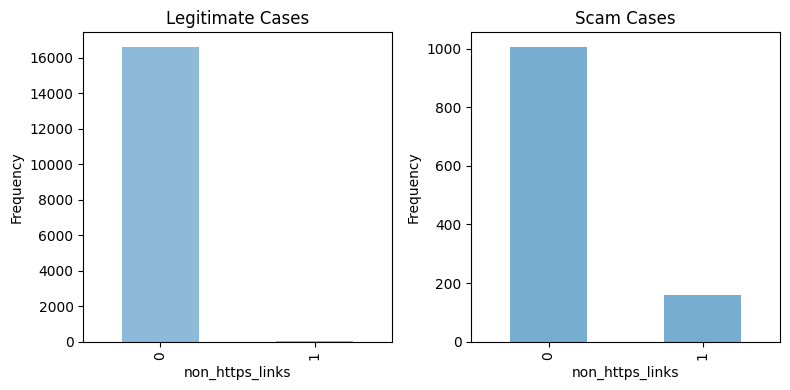

In [ ]:
compare_plot_fraudulent_and_nonfraudulent_class(df,'non_https_links')


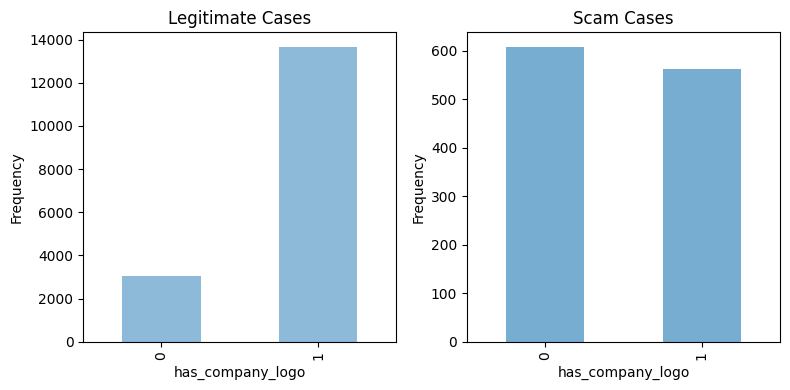

In [ ]:
compare_plot_fraudulent_and_nonfraudulent_class(df, 'has_company_logo')


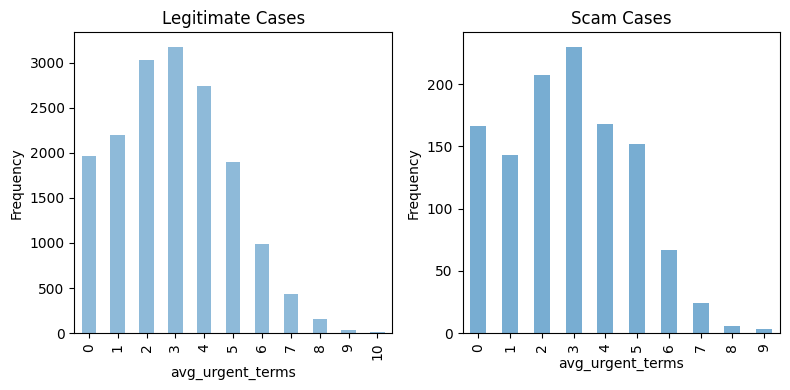

In [ ]:
compare_plot_fraudulent_and_nonfraudulent_class(df, 'avg_urgent_terms')

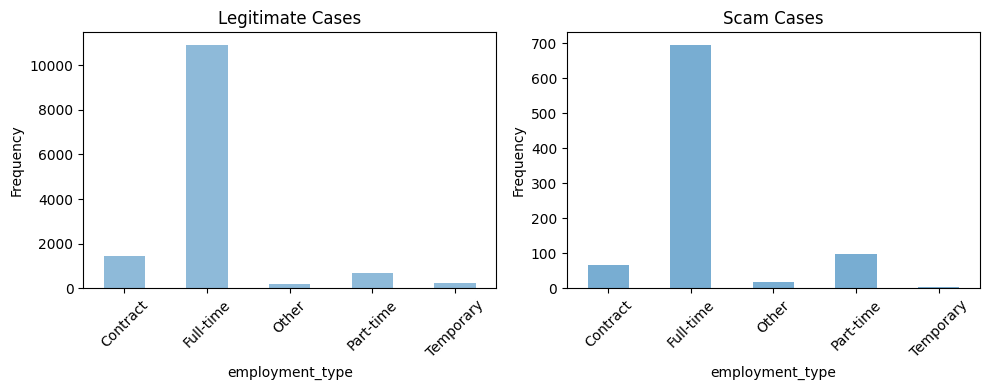

In [ ]:
def compare_plot_fraudulent_and_nonfraudulent_class(df, feature, tag="original", nrows=1, ncols=2):
    import pandas as pd
    import numpy as np
    import matplotlib.pyplot as plt

    filtered_df_f = df.loc[df['is_scam'] == 0.0]
    filtered_df_t = df.loc[df['is_scam'] == 1.0]

    # Only drop NaNs (do NOT force int conversion anymore)
    value_counts_f = (
        filtered_df_f[feature]
        .dropna()
        .value_counts()
        .sort_index()
    )

    value_counts_t = (
        filtered_df_t[feature]
        .dropna()
        .value_counts()
        .sort_index()
    )

    fig, axes = plt.subplots(nrows=nrows, ncols=ncols, figsize=(10, 4))

    value_counts_f.plot(kind='bar', ax=axes[0], alpha=0.5)
    axes[0].set_title('Legitimate Cases')
    axes[0].set_ylabel('Frequency')
    axes[0].set_xlabel(feature)
    axes[0].tick_params(axis='x', rotation=45)

    value_counts_t.plot(kind='bar', ax=axes[1], alpha=0.6)
    axes[1].set_title('Scam Cases')
    axes[1].set_ylabel('Frequency')
    axes[1].set_xlabel(feature)
    axes[1].tick_params(axis='x', rotation=45)

    plt.tight_layout()
    plt.show()

# Example usage:
compare_plot_fraudulent_and_nonfraudulent_class(df, 'employment_type')


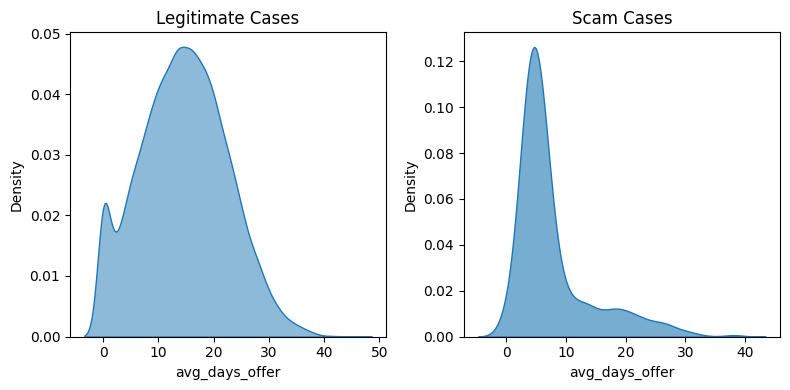

In [ ]:
def compare_plot_fraudulent_and_nonfraudulent_class(df, feature, tag="original", nrows=1, ncols=2):
    import pandas as pd
    import numpy as np
    import matplotlib.pyplot as plt
    import seaborn as sns  # we'll use seaborn for smooth KDE plots

    filtered_df_f = df.loc[df['is_scam'] == 0.0]
    filtered_df_t = df.loc[df['is_scam'] == 1.0]

    fig, axes = plt.subplots(nrows=nrows, ncols=ncols, figsize=(8, 4))

    # Plot KDE for non-fraudulent cases
    sns.kdeplot(data=filtered_df_f, x=feature, fill=True, ax=axes[0], alpha=0.5)
    axes[0].set_title('Legitimate Cases')
    axes[0].set_ylabel('Density')
    axes[0].set_xlabel(feature)

    # Plot KDE for fraudulent cases
    sns.kdeplot(data=filtered_df_t, x=feature, fill=True, ax=axes[1], alpha=0.6)
    axes[1].set_title('Scam Cases')
    axes[1].set_ylabel('Density')
    axes[1].set_xlabel(feature)

    plt.tight_layout()
    plt.show()

# Example usage:
compare_plot_fraudulent_and_nonfraudulent_class(df, 'avg_days_offer')


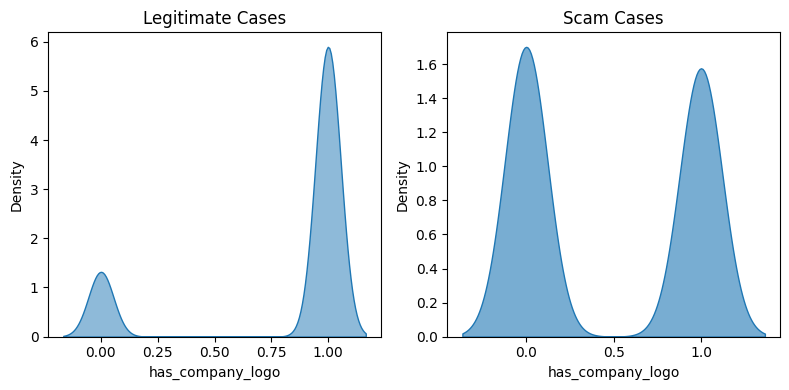

In [ ]:
compare_plot_fraudulent_and_nonfraudulent_class(df, 'has_company_logo')


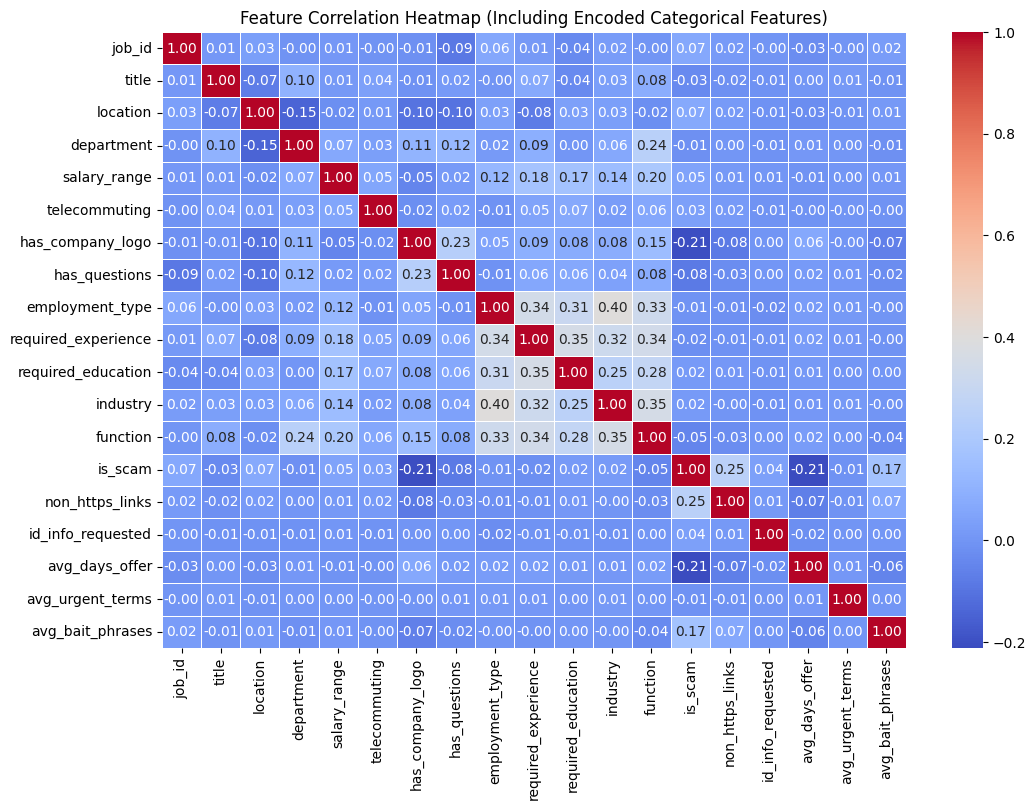

In [ ]:
import seaborn as sns

df_encoded = df.copy()

for col in df.select_dtypes(include=['object']).columns:
    df_encoded[col] = df_encoded[col].astype('category').cat.codes

corr_matrix = df_encoded.corr()

plt.figure(figsize=(12, 8))
sns.heatmap(corr_matrix, annot=True, fmt=".2f", cmap="coolwarm", linewidths=0.5)
plt.title("Feature Correlation Heatmap (Including Encoded Categorical Features)")
plt.show()


In [ ]:
df.rename(columns={'fraudulent': 'is_scam'}, inplace=True)
df.to_csv('email_job_scam.csv', index=False)


In [ ]:
print(len(df))
print(df.isnull().sum())


17880
job_id                     0
title                      0
location                 346
department             11547
salary_range           15012
telecommuting              0
has_company_logo           0
has_questions              0
employment_type         3471
required_experience     7050
required_education      8105
industry                4903
function                6455
is_scam                    0
non_https_links           89
id_info_requested         89
avg_days_offer            89
avg_urgent_terms          89
avg_bait_phrases          89
dtype: int64


In [ ]:
print('Percent of Null Values in Each Column:\n')
print(df.isnull().mean() * 100)

Percent of Null Values in Each Column:

job_id                  0.000000
title                   0.000000
location                1.935123
department             64.580537
salary_range           83.959732
telecommuting           0.000000
has_company_logo        0.000000
has_questions           0.000000
employment_type        19.412752
required_experience    39.429530
required_education     45.329978
industry               27.421700
function               36.101790
is_scam                 0.000000
non_https_links         0.497763
id_info_requested       0.497763
avg_days_offer          0.497763
avg_urgent_terms        0.497763
avg_bait_phrases        0.497763
dtype: float64


In [ ]:
df['location'] = df['location'].fillna('Unknown')
df['department'] = df['department'].fillna('Unknown')
df['salary_range'] = df['salary_range'].fillna('Not Specified')
df['employment_type'] = df['employment_type'].fillna('Not Specified')
df['required_experience'] = df['required_experience'].fillna('Not Specified')
df['required_education'] = df['required_education'].fillna('Not Specified')
df['industry'] = df['industry'].fillna('Not Specified')
df['function'] = df['function'].fillna('Not Specified')


In [ ]:
print("Fraudulent Value Counts:")
print(df['is_scam'].value_counts())

Fraudulent Value Counts:
is_scam
0    16709
1     1171
Name: count, dtype: int64


In [ ]:
from sklearn.impute import KNNImputer
import pandas as pd

knn_features = [
    'non_https_links',
    'id_info_requested',
    'avg_days_offer',
    'avg_urgent_terms',
    'avg_bait_phrases'
]

numeric_cols = df.select_dtypes(include='number').columns.tolist()
other_features = list(set(numeric_cols) - set(knn_features))

impute_df = df[knn_features + other_features].copy()
from sklearn.impute import KNNImputer

imputer = KNNImputer(n_neighbors=5)  # You can tune this (3–10 often works well)
imputed_array = imputer.fit_transform(impute_df)

imputed_df = pd.DataFrame(imputed_array, columns=impute_df.columns)

for col in knn_features:
    df[col] = imputed_df[col]

df['non_https_links'] = df['non_https_links'].round()
df['id_info_requested'] = df['id_info_requested'].round()


In [ ]:
print(df.isnull().mean() * 100)

job_id                 0.0
title                  0.0
location               0.0
department             0.0
salary_range           0.0
telecommuting          0.0
has_company_logo       0.0
has_questions          0.0
employment_type        0.0
required_experience    0.0
required_education     0.0
industry               0.0
function               0.0
is_scam                0.0
non_https_links        0.0
id_info_requested      0.0
avg_days_offer         0.0
avg_urgent_terms       0.0
avg_bait_phrases       0.0
dtype: float64


In [ ]:
df.to_csv('email_job_scam_cleaned.csv', index=False)